File Placement Requirement
This Jupyter Notebook (.ipynb) must be placed in the same directory as the following two Python files:

preprocessing.py – handles data loading and TF-IDF feature extraction

cross_validation.py – contains the custom cross-validation function

Important Code Modification in preprocessing.py
In order to work correctly in Google Colab or local environments, the following line has been modified:


data = pd.read_csv('../data/phishing_email.csv')  # ❌ original
is now:
data = pd.read_csv('phishing_email.csv')          # ✅ updated
This assumes that phishing_email.csv is located in the same folder as the Notebook and Python files.

**How to test ????**

Make sure Python and Jupyter are installed.

Place all files in the same local folder.

Open terminal / command prompt and navigate to that folder.

Run:
jupyter notebook

Open random_forest.ipynb in the browser and run all cells in order.



In [4]:
!dir



 Volume in drive C is OS
 Volume Serial Number is 96B6-E1DE

 Directory of c:\Users\Srivani\Documents\Term-3\Professional\Project\classifier

28-07-2025  18:03    <DIR>          .
28-07-2025  13:07    <DIR>          ..
28-07-2025  13:07             3,953 all_algorithm.py
28-07-2025  18:09             3,355 bayes.py
16-07-2025  00:41             1,451 cross_validation.py
28-07-2025  13:07            17,093 dnn_classifier.ipynb
28-07-2025  18:43             3,787 FLD.py
28-07-2025  18:06             3,230 logistic_regression.py
28-07-2025  13:07         4,375,144 mlp_model.joblib
15-07-2025  20:31    <DIR>          results_bert
22-07-2025  08:16            43,036 RF.ipynb
28-07-2025  13:07    <DIR>          __pycache__
               8 File(s)      4,451,049 bytes
               4 Dir(s)  303,503,491,072 bytes free


In [7]:
import sys
import os

# Add parent directory (adjust as needed)
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))


Confusion Matrix:
 [[7784  174]
 [ 138 8402]]
Balanced Accuracy: 0.9809879796331207
AUC Score: 0.9974652714220383
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      7958
           1       0.98      0.98      0.98      8540

    accuracy                           0.98     16498
   macro avg       0.98      0.98      0.98     16498
weighted avg       0.98      0.98      0.98     16498



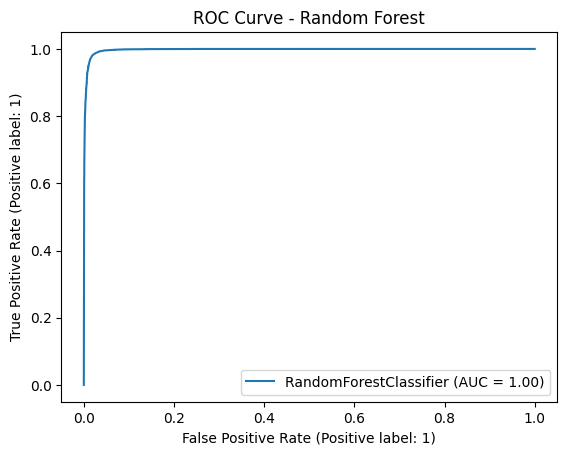

In [8]:
from Dataset.preprocessing import word_vectorization
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, balanced_accuracy_score, classification_report, RocCurveDisplay
import matplotlib.pyplot as plt

# Use the preprocessing module to load and vectorize the data
X_train_vec, X_test_vec, y_train, y_test = word_vectorization(type='tfidf')

# Train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_vec, y_train)

# Make predictions
y_pred = model.predict(X_test_vec)
y_proba = model.predict_proba(X_test_vec)[:, 1]  # Probabilities for the positive class

# Print evaluation results
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_proba))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot the ROC curve
RocCurveDisplay.from_estimator(model, X_test_vec, y_test)
plt.title("ROC Curve - Random Forest")
plt.show()



In [9]:
from cross_validation import cross_validation


cv_results = cross_validation(model, X_train_vec, y_train, cv=5)

print("\nCross-validation scores (mean ± std):")
for metric, (mean, std) in cv_results.items():
    print(f"{metric}: {mean:.4f} ± {std:.4f}")



Cross-validation scores (mean ± std):
accuracy: 0.9800 ± 0.0013
precision: 0.9791 ± 0.0020
recall: 0.9824 ± 0.0015
f1: 0.9808 ± 0.0012


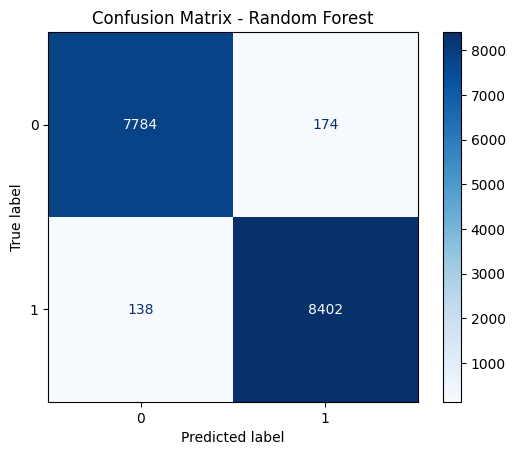

In [10]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.grid(False)
plt.show()
